# 4. Modeling & Evaluation

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Import Data

In [2]:
df = pd.read_csv('/Users/cenkyagkan/books/data_analytics/content/final_dataset_cluster.csv')

### Preprocessing-Steps from last notebook

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

x = df[['Einkommen', 'Leasingrate']].to_numpy()

# Initialisierung des iterativen Imputers mit 10 Iterationen 
imp = IterativeImputer(max_iter=10, random_state=0)

# Fit und Transform für das Array x
imp.fit(x)
x_all_values = np.round(imp.transform(x), 0)

df['Leasingrate'] = x_all_values[:, [1]]

In [4]:
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Einkommen', 'Leasingrate']].to_numpy()

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Modeling

Im Rahmen dieses Usecases werde ich den **K-Means Algorithmus** verwenden, um eine Kundensegmentierung durchzuführen. Da für den K-Means Algorithmus auch angegeben werden muss, wie viele Cluster gefunden werden sollen, werde ich im folgenden zu einem auf die **Elbow-Methode** und auf den **Silhouettenkoeffizient** zurückgreifen, um K zu bestimmen.

## Elbow-Methode

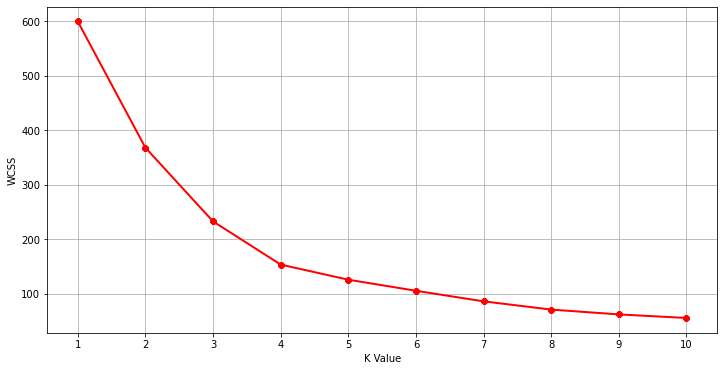

In [5]:
wcss = []
for k in range(1,11):
    #k_means++ wählt die anfänglichen Clusterzentren für das k-mean Clustering auf intelligente Weise aus, um die Konvergenz zu beschleunigen. 
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

- Hierbei wird berechnet, inwieweit ein weiteres Cluster die Distanzen innerhalb des Cluster minimiert. Dadurch kann man erkennen, was eine gute Anzahl an Clustern ist.
- WCSS steht hierbei für Within Cluster Sum Of Squares (WCSS) und ist die Summe der quadratischen Abstände zwischen jedem Punkt und dem Centroid eines Clusters.
- **In diesem Fall wäre K = 4 eine gute Einstellung für die Kundensegmentierung.**

## Silhouettenkoeffizient für die Bestimmung von K

For n_clusters = 2 The average silhouette_score is : 0.3522128178060293


For n_clusters = 3 The average silhouette_score is : 0.39840316458337854
For n_clusters = 4 The average silhouette_score is : 0.4225082013762389
For n_clusters = 5 The average silhouette_score is : 0.3950503666132004


For n_clusters = 6 The average silhouette_score is : 0.371081007805033


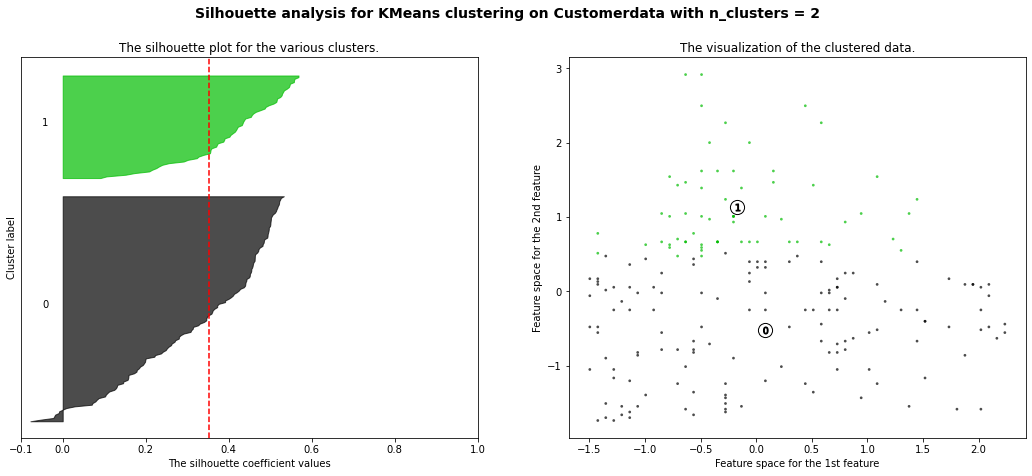

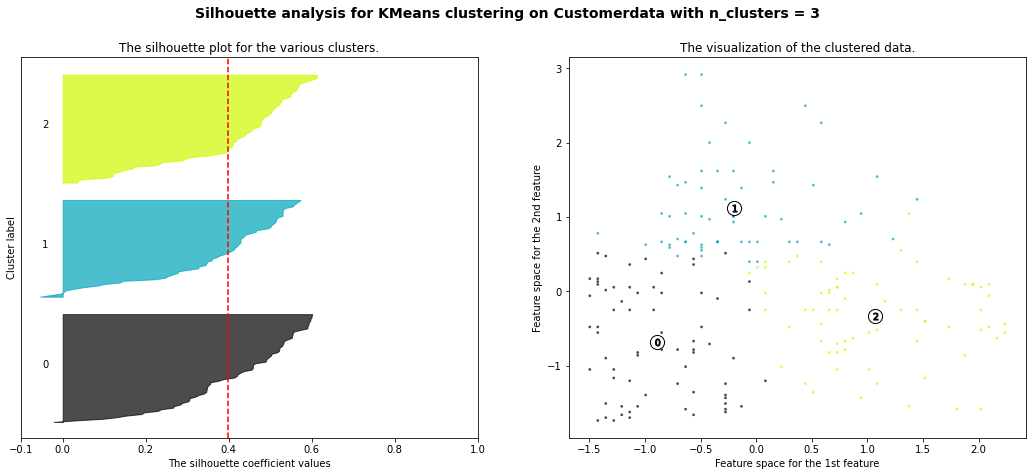

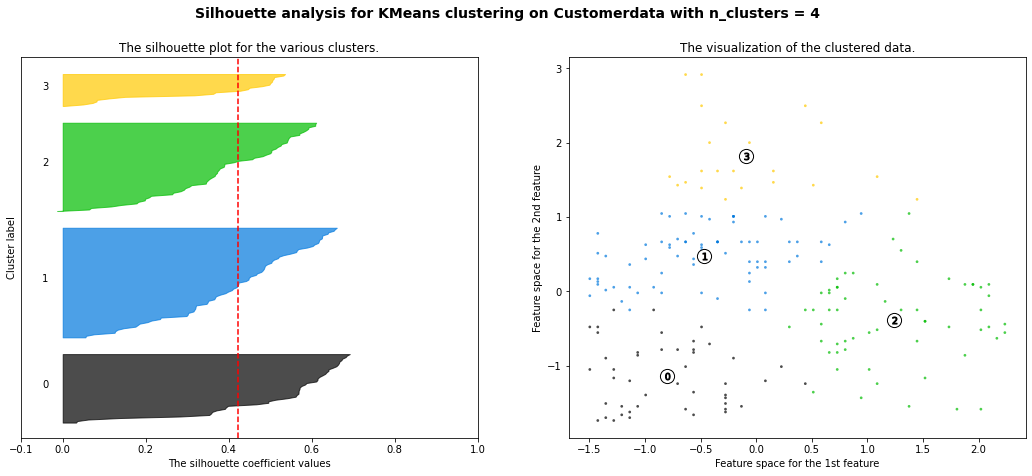

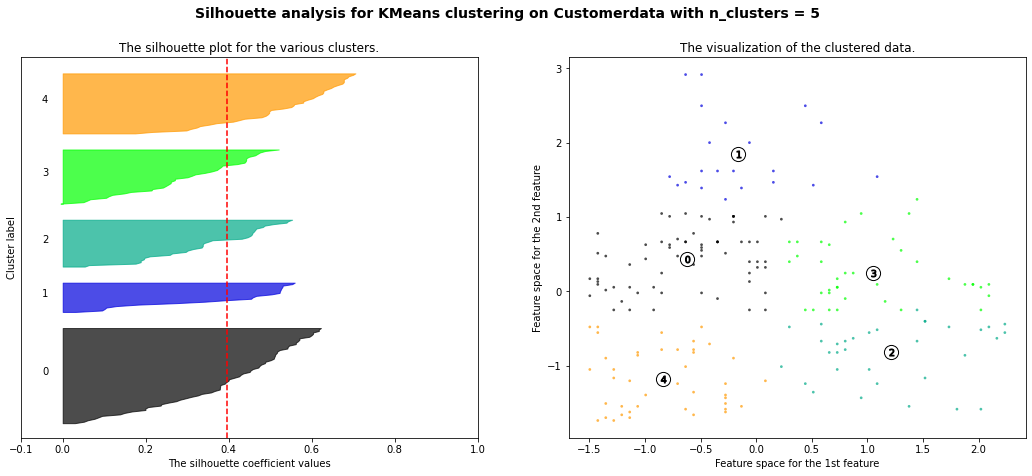

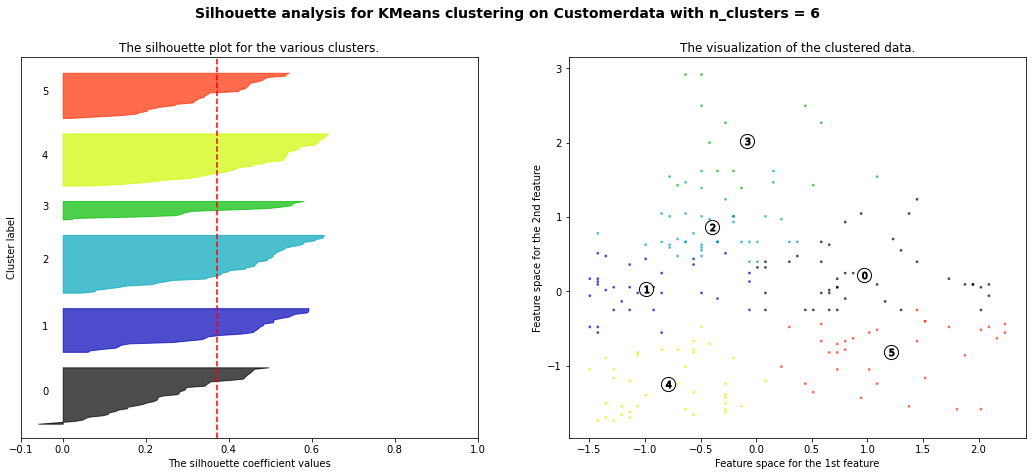

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_std)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_std, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_std[:, 0], X_std[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on Customerdata with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

- Auch mit dem durschnittlichen Silhouettenscore hat sich gezeigt, dass K = 4 eine gute Einstellung für die Kundensegmentierung ist.
-> For n_clusters = 4 The average silhouette_score is : 0.4225082013762389
- Generell liegt der SilSilhouettenscore im positiven Bereich (0,35 bis 0,42), jedoch nicht nahe an 1. Dies zeigt, dass die Beobachtungen sehr nahe an oder auf Entschediungsgrenzen zwischen zwei benachbarten Clustern liegen.

## Anwendung K-Means Alogrithmus

In [7]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(X_std)

KMeans(n_clusters=4)

In [8]:
y_kmeans = kmeans.predict(X_std)
print(y_kmeans)

[1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 2 1 1 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 1
 1 1 1 2 1 2 1 2 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 3 3 2 2 3 2 2 1 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


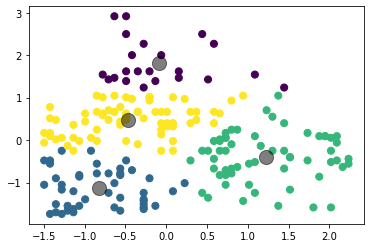

In [9]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Evaluation

Im Gegensatz zum überwachten Lernen, bei dem ich die Labels (also die Grundwahrheit) habe, um die Leistung des Modells zu bewerten, gibt es bei der Clustering-Analyse keine solide Bewertungsmetrik, um das Ergebnis zu bewerten.

So beziehe ich mich an dieser Stelle auf den Silhouettenscore. Bei der Bestimmung von K hat sich gezeit, dass K = 4 der beste Wert ist, um die Kunden in unterschiedliche Cluster zu unterteilen.

Betrachtet man die dicke der Silhouettenplots bei K = 4 kann man erkennen, dass alle Cluster ähnlich groß sind, bis auf das Clusterlabel 3. Das sind vermutlich Kunden mit einem hohen Einkommen und einer höheren Leasingrate. Um dies zu überprüfen werden im folgenden die identifizierten Cluster interpretiert.

## Interpretation

In [10]:
df['Label'] = y_kmeans

In [11]:
df

,Gender,Age,Einkommen,Leasingrate,Label
0,Male,19,15000,422.0,1
1,Male,21,15000,428.0,1
2,Female,20,16000,490.0,1
3,Female,23,16000,476.0,1
4,Female,31,17000,492.0,1
...,...,...,...,...,...
195,Female,35,120000,1557.0,0
196,Female,45,126000,1613.0,0
197,Male,32,126000,1609.0,0
198,Male,32,137000,1534.0,0


### Cluster 0

In [12]:
df_cluster_0 = df[df['Label'] == 0]

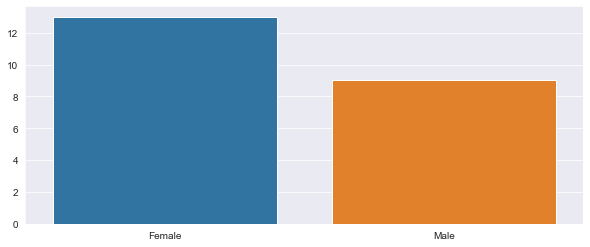

In [13]:
genders = df_cluster_0.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [14]:
df_cluster_0.Gender.value_counts()

Female    13
Male       9
Name: Gender, dtype: int64

- In dem Cluster 0 befinden sich mehr Frauen (28) als Männer (16)

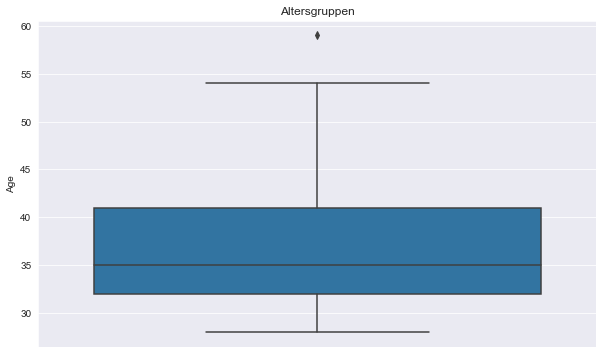

In [15]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.boxplot(y=df_cluster_0["Age"])
plt.show()

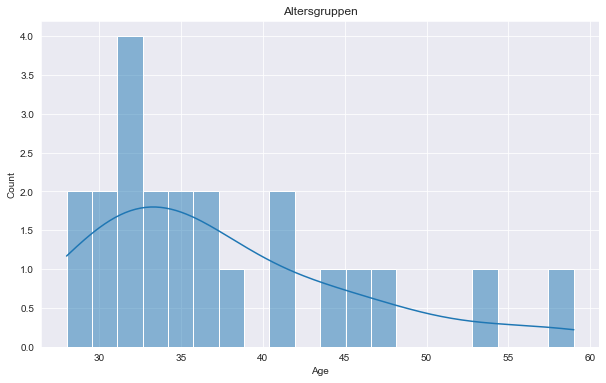

In [16]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.histplot(x=df_cluster_0["Age"], kde=True, bins= 20)
plt.show()

- In dem Cluster 0 kommt das Alter zwischen 20 Jahren und 35 Jahren am häufigsten vor. Es gibt Häufungen für das Alter 20, 30 und 35.

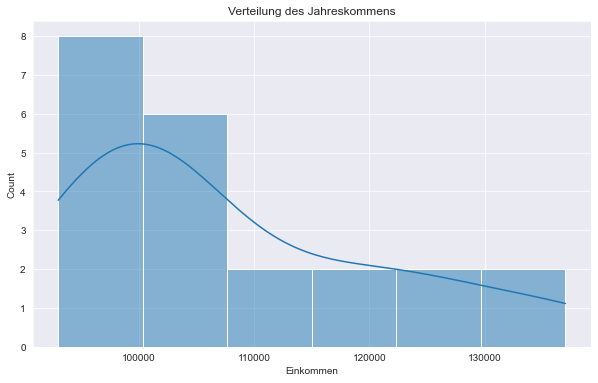

In [17]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.histplot(data=df_cluster_0, x="Einkommen", kde=True);
plt.show()

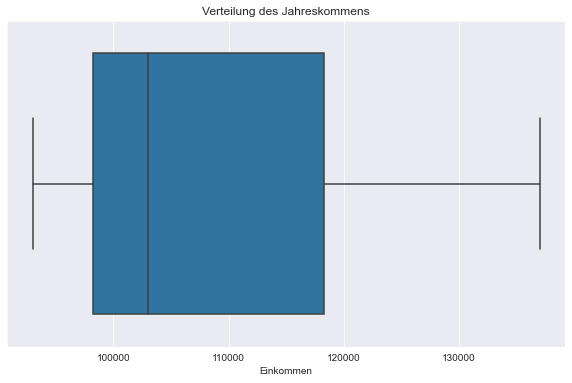

In [18]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_0, x="Einkommen");
plt.show()

In [19]:
print(df_cluster_0.Einkommen.min())
print(df_cluster_0.Einkommen.max())

93000
137000


- Die Kunden die sich in Cluster 0 befinden haben ein Einkommen zwischen 15.000 und 48.000 Euro. Wobei es Häufungen zwischen 15.000 und 30.000 Euro gibt und eine zweite Häufung in dem Bereich 35.000 bis 45.000 Euro.

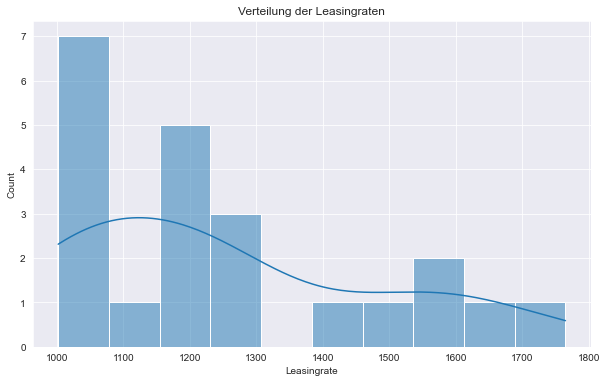

In [20]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.histplot(data=df_cluster_0, x="Leasingrate", kde=True, bins = 10);
plt.show()

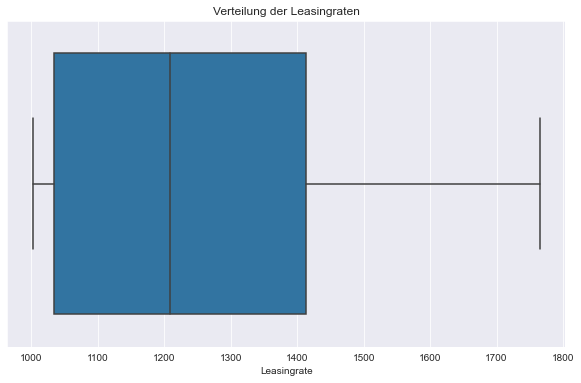

In [21]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_0, x="Leasingrate");
plt.show()

In [22]:
print(df_cluster_0.Leasingrate.min())
print(df_cluster_0.Leasingrate.max())

1002.0
1765.0


- In Cluster 0 liegt die Leasingrate zwischen 422 Euro und 646 Euro. Wobei die meisten Leasingraten zwischen 450 und 550 Euro liegen.

### Cluster 1

In [23]:
df_cluster_1 = df[df['Label'] == 1]

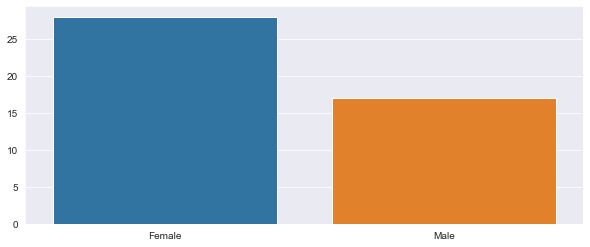

In [24]:
genders = df_cluster_1.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [25]:
df_cluster_1.Gender.value_counts()

Female    28
Male      17
Name: Gender, dtype: int64

- In Cluster 1 ist das Verhältnis zwischen Frauen(39) und Männern(36) fast ausgewogen.

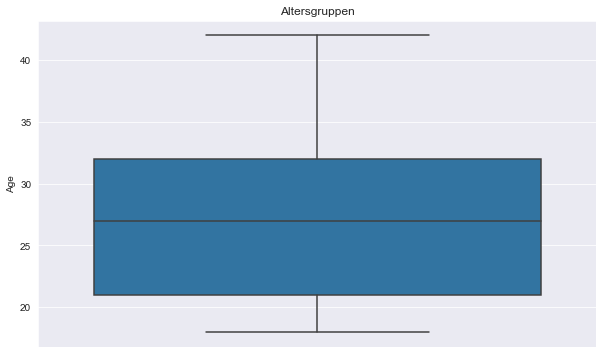

In [26]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.boxplot(y=df_cluster_1["Age"])
plt.show()

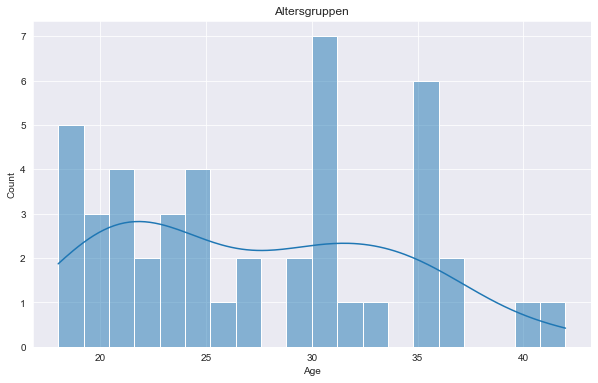

In [27]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.histplot(x=df_cluster_1["Age"], kde=True, bins= 20)
plt.show()

In [28]:
print(df_cluster_1.Age.min())
print(df_cluster_1.Age.max())

18
42


- In dem Cluster 1 liegt das Alter zwischen 18 Jahren und 52 Jahren. Dabei kommt das Alter zwischen 18 und 40 am Häufigsten vor.

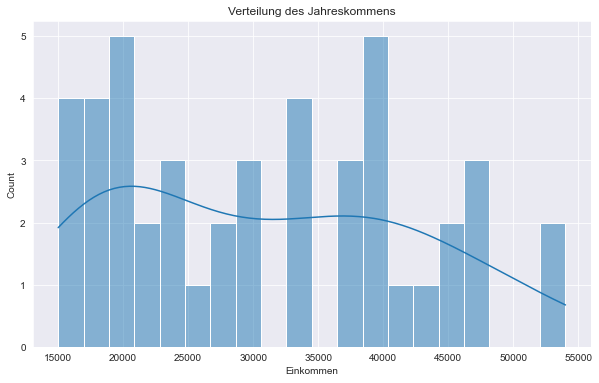

In [29]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.histplot(data=df_cluster_1, x="Einkommen", kde=True, bins = 20);
plt.show()

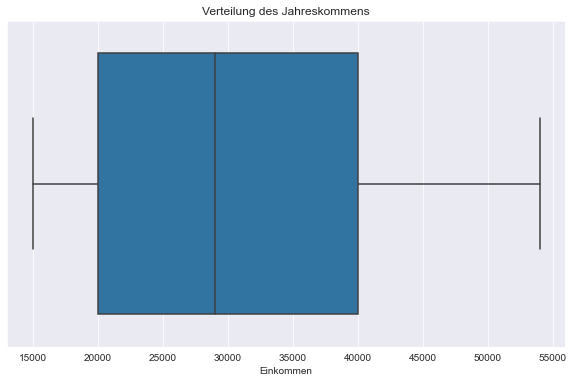

In [30]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_1, x="Einkommen");
plt.show()

In [31]:
print(df_cluster_1.Einkommen.min())
print(df_cluster_1.Einkommen.max())

15000
54000


- Die Kunden die sich in Cluster 1 befinden haben ein Einkommen zwischen 54.000 und 88.000 Euro. Wobei es Häufungen zwischen 70.000 und 80.000 Euro gibt und eine zweite Häufung ab dem Wert von 85.000 Euro.

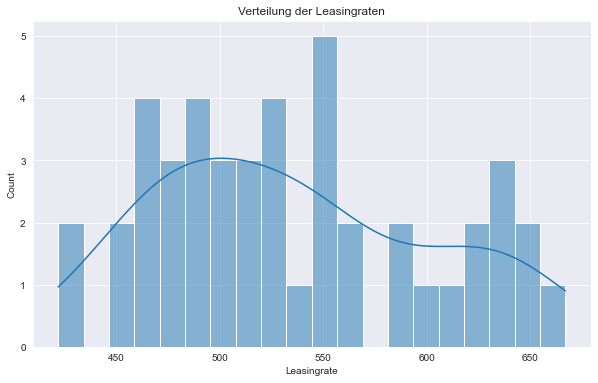

In [32]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.histplot(data=df_cluster_1, x="Leasingrate", kde=True, bins = 20);
plt.show()

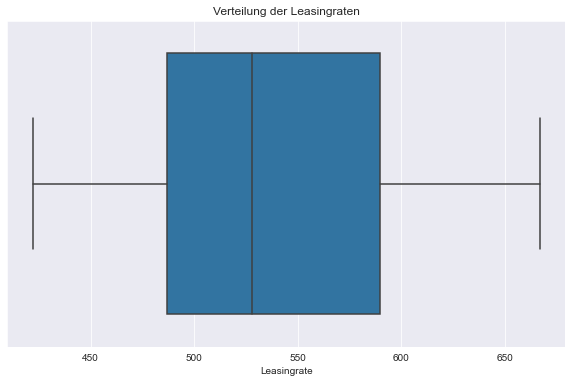

In [33]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_1, x="Leasingrate");
plt.show()

In [34]:
print(df_cluster_1.Leasingrate.min())
print(df_cluster_1.Leasingrate.max())

422.0
667.0


In [35]:
df_cluster_1.describe()

,Age,Einkommen,Leasingrate,Label
count,45.000000,45.000000,45.000000,45.0
mean,27.333333,30777.777778,534.711111,1.0
std,6.564367,11603.073435,66.139530,0.0
min,18.000000,15000.000000,422.000000,1.0
25%,21.000000,20000.000000,487.000000,1.0
50%,27.000000,29000.000000,528.000000,1.0
75%,32.000000,40000.000000,590.000000,1.0
max,42.000000,54000.000000,667.000000,1.0


- In Cluster 1 liegt die Leasingrate zwischen 650 Euro und 923 Euro. Wobei 75% der Leaeasingraten unter 866 Euro liegen.

### Cluster 2

In [36]:
df_cluster_2 = df[df['Label'] == 2]

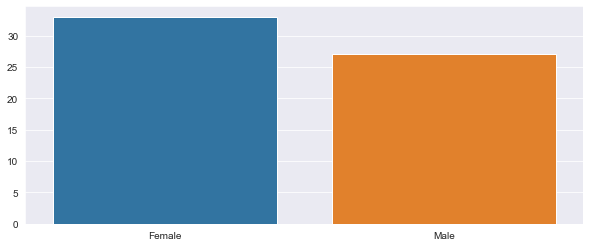

In [37]:
genders = df_cluster_2.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [38]:
df_cluster_2.Gender.value_counts()

Female    33
Male      27
Name: Gender, dtype: int64

- In dem Cluster 2 befinden sich mehr Frauen (32) als Männer (27)

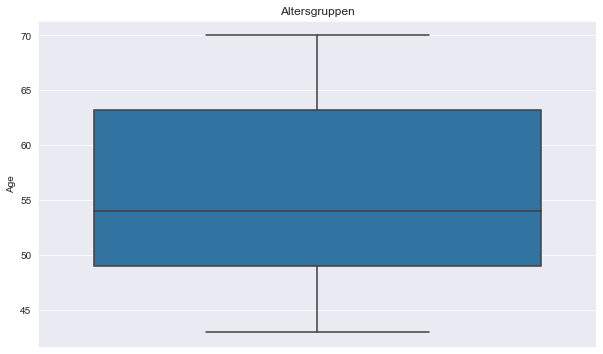

In [39]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.boxplot(y=df_cluster_2["Age"])
plt.show()

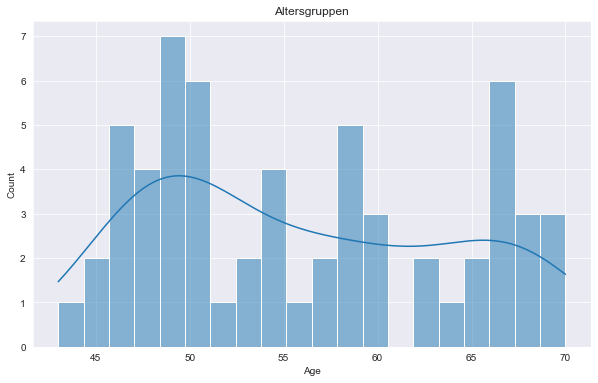

In [40]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.histplot(x=df_cluster_2["Age"], kde=True, bins= 20)
plt.show()

In [41]:
print(df_cluster_2.Age.min())
print(df_cluster_2.Age.max())

43
70


In [42]:
df_cluster_2.describe()

,Age,Einkommen,Leasingrate,Label
count,60.000000,60.000000,60.000000,60.0
mean,55.900000,50200.000000,653.350000,2.0
std,8.003601,14977.723572,107.687373,0.0
min,43.000000,19000.000000,456.000000,2.0
25%,49.000000,42750.000000,578.500000,2.0
50%,54.000000,50000.000000,653.500000,2.0
75%,63.250000,62000.000000,743.250000,2.0
max,70.000000,88000.000000,940.000000,2.0


- In dem Cluster 2 liegt das Alter zwischen 43 Jahren und 70 Jahren. Dabei kommt das Alter zwischen 43 und 64 am Häufigsten vor.

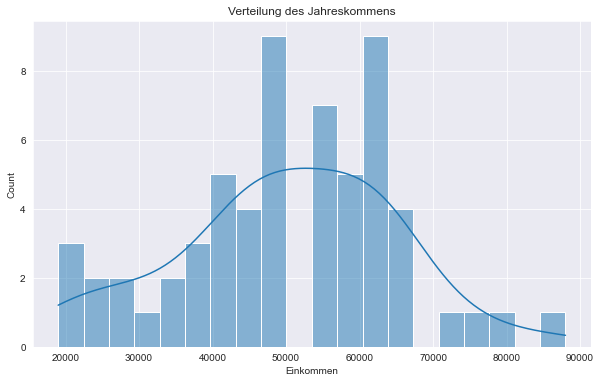

In [43]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.histplot(data=df_cluster_2, x="Einkommen", kde=True, bins = 20);
plt.show()

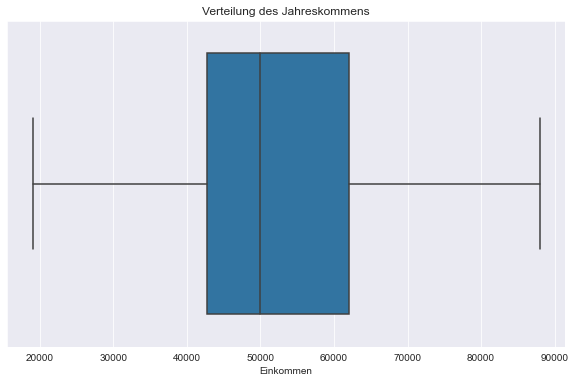

In [44]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_2, x="Einkommen");
plt.show()

In [45]:
print(df_cluster_2.Einkommen.min())
print(df_cluster_2.Einkommen.max())

19000
88000


In [46]:
df_cluster_2.describe()

,Age,Einkommen,Leasingrate,Label
count,60.000000,60.000000,60.000000,60.0
mean,55.900000,50200.000000,653.350000,2.0
std,8.003601,14977.723572,107.687373,0.0
min,43.000000,19000.000000,456.000000,2.0
25%,49.000000,42750.000000,578.500000,2.0
50%,54.000000,50000.000000,653.500000,2.0
75%,63.250000,62000.000000,743.250000,2.0
max,70.000000,88000.000000,940.000000,2.0


- Die Einkommensspanne in Cluster 2 ist sehr groß. Hierbei beträgt das geringste Einkommen 18.000 Euro und höchste Einkommen 88.000 Euro.
- Jedoch befindet sich ein Großteil des Einkommens zwischen 43.000 Euro und 62.000 Euro.

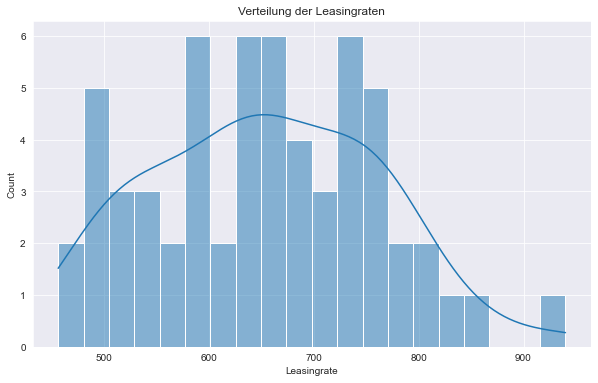

In [47]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.histplot(data=df_cluster_2, x="Leasingrate", kde=True, bins = 20);
plt.show()

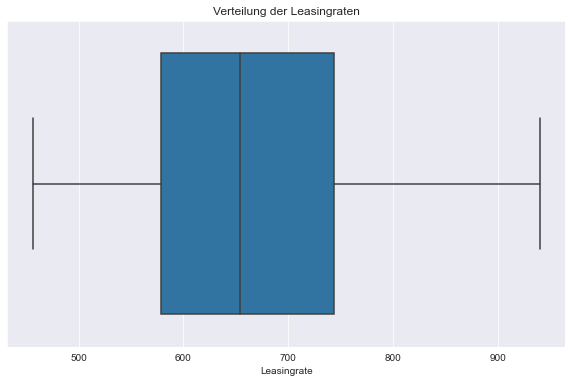

In [48]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_2, x="Leasingrate");
plt.show()

In [49]:
print(df_cluster_2.Leasingrate.min())
print(df_cluster_2.Leasingrate.max())

456.0
940.0


In [50]:
df_cluster_2.describe()

,Age,Einkommen,Leasingrate,Label
count,60.000000,60.000000,60.000000,60.0
mean,55.900000,50200.000000,653.350000,2.0
std,8.003601,14977.723572,107.687373,0.0
min,43.000000,19000.000000,456.000000,2.0
25%,49.000000,42750.000000,578.500000,2.0
50%,54.000000,50000.000000,653.500000,2.0
75%,63.250000,62000.000000,743.250000,2.0
max,70.000000,88000.000000,940.000000,2.0


- Sowohl beim Einkommen als auch bei der Leasingrate liegt in Cluster 2 eine große Spanne vor. Die geringste Leasingrate beträgt 456 Euro und höchste 940 Euro.
- Ein Großteil der Leasingraten liegt zwischen 581 Euro und 743 Euro.

### Cluster 3

In [51]:
df_cluster_3 = df[df['Label'] == 3]

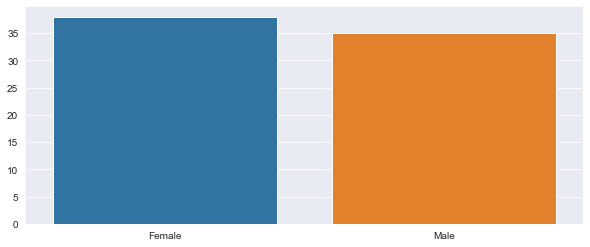

In [52]:
genders = df_cluster_3.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [53]:
df_cluster_3.Gender.value_counts()

Female    38
Male      35
Name: Gender, dtype: int64

- In dem Cluster 3 befinden sich ebenfalls mehr Frauen (13) als Männer (9)

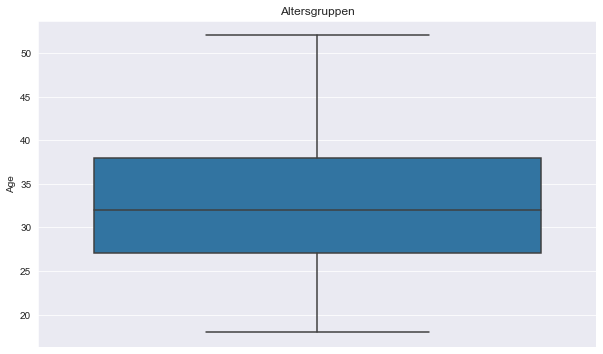

In [54]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.boxplot(y=df_cluster_3["Age"])
plt.show()

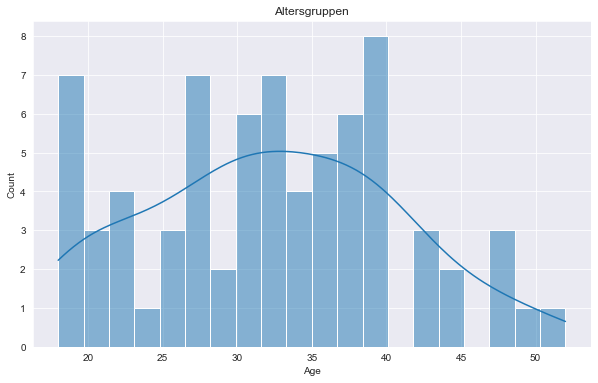

In [55]:
plt.figure(figsize=(10,6))
plt.title("Altersgruppen")
sns.axes_style("dark")
sns.histplot(x=df_cluster_3["Age"], kde=True, bins= 20)
plt.show()

In [56]:
print(df_cluster_3.Age.min())
print(df_cluster_3.Age.max())

18
52


In [57]:
df_cluster_3.describe()

,Age,Einkommen,Leasingrate,Label
count,73.000000,73.000000,73.000000,73.0
mean,32.328767,73082.191781,792.397260,3.0
std,8.483734,9505.485879,87.351261,0.0
min,18.000000,54000.000000,653.000000,3.0
25%,27.000000,65000.000000,717.000000,3.0
50%,32.000000,74000.000000,793.000000,3.0
75%,38.000000,78000.000000,867.000000,3.0
max,52.000000,88000.000000,923.000000,3.0


- In dem Cluster 2 liegt das Alter zwischen 28 Jahren und 59 Jahren. Dabei kommt das Alter zwischen 32 und 41 am Häufigsten vor.

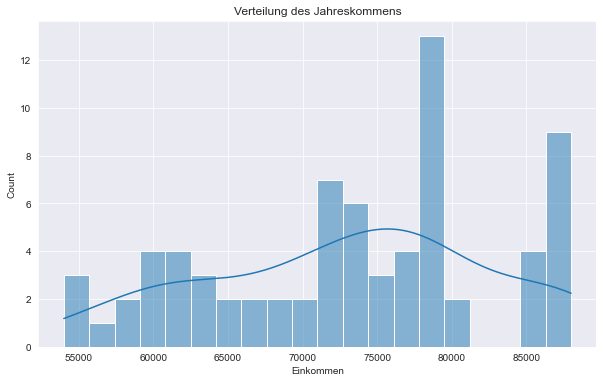

In [58]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.histplot(data=df_cluster_3, x="Einkommen", kde=True, bins = 20);
plt.show()

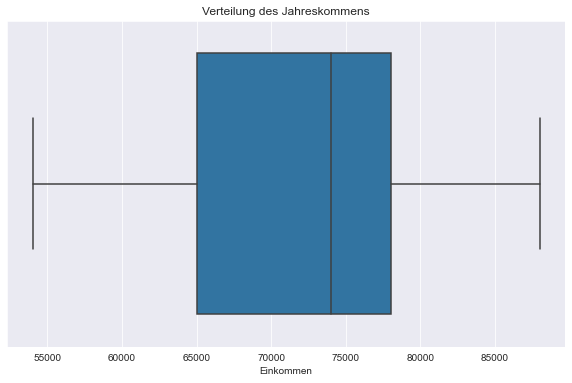

In [59]:
plt.figure(figsize=(10,6))
plt.title("Verteilung des Jahreskommens")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_3, x="Einkommen");
plt.show()

In [60]:
print(df_cluster_3.Einkommen.min())
print(df_cluster_3.Einkommen.max())

54000
88000


In [61]:
df_cluster_3.describe()

,Age,Einkommen,Leasingrate,Label
count,73.000000,73.000000,73.000000,73.0
mean,32.328767,73082.191781,792.397260,3.0
std,8.483734,9505.485879,87.351261,0.0
min,18.000000,54000.000000,653.000000,3.0
25%,27.000000,65000.000000,717.000000,3.0
50%,32.000000,74000.000000,793.000000,3.0
75%,38.000000,78000.000000,867.000000,3.0
max,52.000000,88000.000000,923.000000,3.0


- Wie bereits am Anfang vermutet wurde, handelt sich bei dem Cluster 3 um die kleinste Gruppe, wobei die Kunden im Vergleich zu den anderen zu den "Besserverdienern" gehören.
- So liegt hier die Einkommenssanne zwischen 93.000 Euro und 137.000 Euro.
- Die meisten Jahresgehälter liegen hier zwischen 103.000 Euro und 118250 Euro.

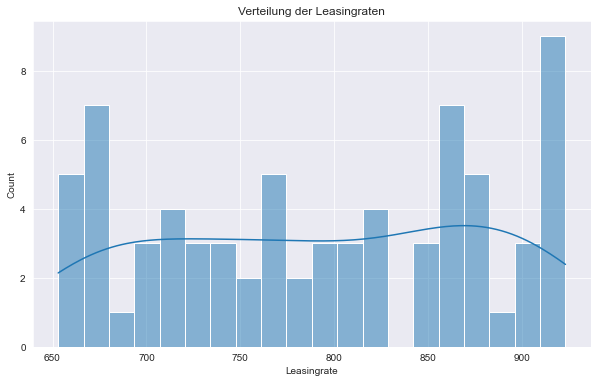

In [62]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.histplot(data=df_cluster_3, x="Leasingrate", kde=True, bins = 20);
plt.show()

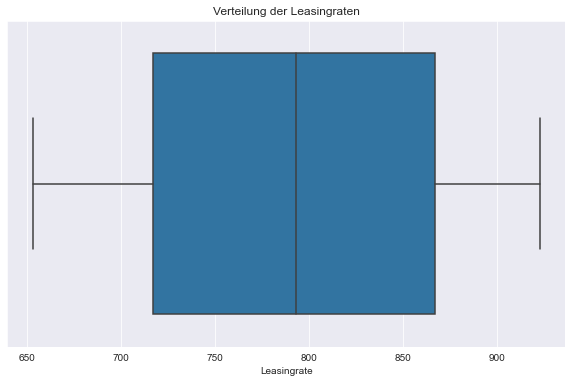

In [63]:
plt.figure(figsize=(10,6))
plt.title("Verteilung der Leasingraten")
sns.axes_style("dark")
sns.boxplot(data=df_cluster_3, x="Leasingrate");
plt.show()

In [64]:
print(df_cluster_3.Leasingrate.min())
print(df_cluster_3.Leasingrate.max())

653.0
923.0


In [65]:
df_cluster_3.describe()

,Age,Einkommen,Leasingrate,Label
count,73.000000,73.000000,73.000000,73.0
mean,32.328767,73082.191781,792.397260,3.0
std,8.483734,9505.485879,87.351261,0.0
min,18.000000,54000.000000,653.000000,3.0
25%,27.000000,65000.000000,717.000000,3.0
50%,32.000000,74000.000000,793.000000,3.0
75%,38.000000,78000.000000,867.000000,3.0
max,52.000000,88000.000000,923.000000,3.0


- Dementsprechend sind auch in diesem Cluster 3 die höchsten Leasingraten zu finden.
- Die geringste Leasingrate beträgt 1002 Euro und die höchste 1765 Euro.
- Ein Großteil der Leasingraten liegen zwischen 1034 Euro und 1412 Euro.


## Zusammenfassung der Cluster-Ergebnisse

### Cluster 0:

- In dem Cluster 0 befinden sich mehr Frauen (28) als Männer (16)
- In dem Cluster 0 kommt das Alter zwischen 20 Jahren und 35 Jahren am häufigsten vor. Es gibt Häufungen für das Alter 20, 30 und 35.
- Die Kunden die sich in Cluster 0 befinden haben ein Einkommen zwischen 15.000 und 48.000 Euro. Wobei es Häufungen zwischen 15.000 und 30.000 Euro gibt und eine zweite Häufung in dem Bereich 35.000 bis 45.000 Euro.
- In Cluster 0 liegt die Leasingrate zwischen 422 Euro und 646 Euro. Wobei die meisten Leasingraten zwischen 450 und 550 Euro liegen.

### Cluster 1:

- In Cluster 1 ist das Verhältnis zwischen Frauen(39) und Männern(36) fast ausgewogen.
- In dem Cluster 1 liegt das Alter zwischen 18 Jahren und 52 Jahren. Dabei kommt das Alter zwischen 18 und 40 am Häufigsten vor.
- Die Kunden die sich in Cluster 1 befinden haben ein Einkommen zwischen 54.000 und 88.000 Euro. Wobei es Häufungen zwischen 70.000 und 80.000 Euro gibt und eine zweite Häufung ab dem Wert von 85.000 Euro.
- In Cluster 1 liegt die Leasingrate zwischen 650 Euro und 923 Euro. Wobei 75% der Leaeasingraten unter 866 Euro liegen.

### Cluster 2:

- In Cluster 2 ist das Verhältnis zwischen Frauen(32) und Männern(27) fast ausgewogen.
- In dem Cluster 2 liegt das Alter zwischen 43 Jahren und 70 Jahren. Dabei kommt das Alter zwischen 43 und 64 am Häufigsten vor.
- Die Einkommensspanne in Cluster 2 ist sehr groß. Hierbei beträgt das geringste Einkommen 18.000 Euro und höchste Einkommen 88.000 Euro.
- Jedoch befindet sich ein Großteil des Einkommens zwischen 43.000 Euro und 62.000 Euro.
- Sowohl beim Einkommen als auch bei der Leasingrate liegt in Cluster 2 eine große Spanne vor. Die geringste Leasingrate beträgt 456 Euro und höchste 940 Euro.
- Ein Großteil der Leasingraten liegt zwischen 581 Euro und 743 Euro.

### Cluster 3:

- In Cluster 3 ist das Verhältnis zwischen Frauen(13) und Männern(9) fast ausgewogen.
- In dem Cluster 2 liegt das Alter zwischen 28 Jahren und 59 Jahren. Dabei kommt das Alter zwischen 32 und 41 am Häufigsten vor.
- Wie bereits am Anfang vermutet wurde, handelt sich bei dem Cluster 3 um die kleinste Gruppe, wobei die Kunden im Vergleich zu den anderen zu den "Besserverdienern" gehören.
- So liegt hier die Einkommenssanne zwischen 93.000 Euro und 137.000 Euro.
- Die meisten Jahresgehälter liegen hier zwischen 103.000 Euro und 118250 Euro.
- Dementsprechend sind auch in diesem Cluster 3 die höchsten Leasingraten zu finden.
- Die geringste Leasingrate beträgt 1002 Euro und die höchste 1765 Euro.
- Ein Großteil der Leasingraten liegen zwischen 1034 Euro und 1412 Euro.


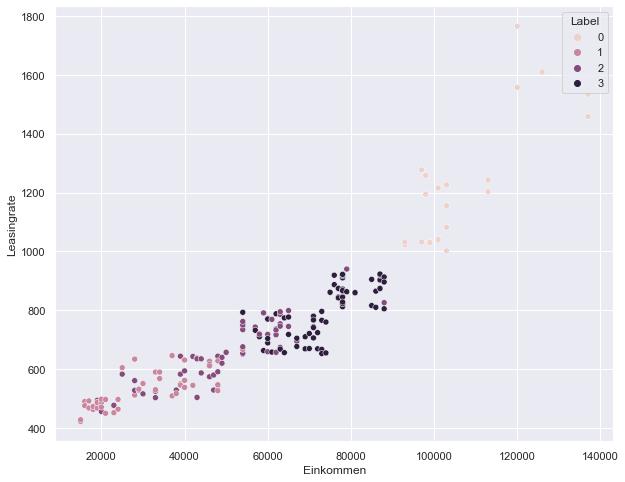

In [66]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(data=df, x="Einkommen", y="Leasingrate", hue='Label');

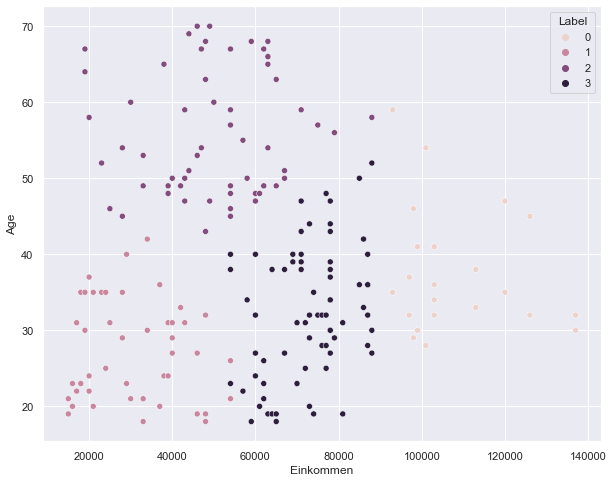

In [67]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(data=df, x="Einkommen", y="Age", hue='Label');

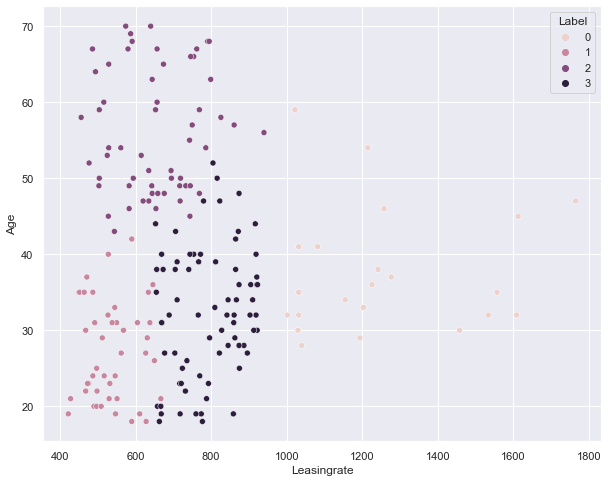

In [68]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(data=df, x="Leasingrate", y="Age", hue='Label');